# Bathymetry : a nice plot !




In [12]:
%matplotlib inline
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np
import numpy.ma as ma



In [3]:
file="/media/extra/DATA/NACHOS12/NACHOS12.L75-I/NACHOS12.L75_bathymetry_20S_80N_nfrontiercleaned_repeat3_retouchbalt.nc"

ds=xr.open_dataset(file)

bathy=ds.Bathymetry

lat=ds.nav_lat
lon=ds.nav_lon



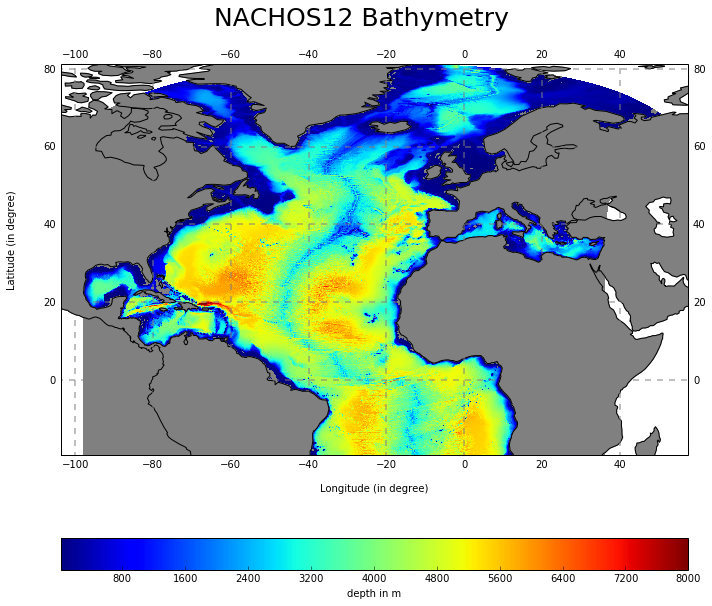

In [29]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-30))
ax.autoscale(tight=True)
cmap = plt.cm.jet
cmap.set_under(color='grey')
pcolor=ax.pcolormesh(lon,lat,bathy,transform=ccrs.PlateCarree(),cmap=cmap,vmin=15,vmax=8000)
ax.add_feature(cfeature.LAND,facecolor='grey')
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.text(-0.07, 0.55, 'Latitude (in degree)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'Longitude (in degree)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label='depth in m')
plt.suptitle("NACHOS12 Bathymetry",fontsize=25)
plt.savefig("bathy_nachos12.png")